# Information-Theoretic Statistics of an Emergent Self

This is a demo notebook detailing the functions I (TFV) wrote to tackle the questions of:

1. What does the information-structure of xenobots/cancerbots/anthrobots look like at a global level?
2. How can that information flow give us insights into the emergent organismal individuality of the bots? 

The first question is (comparatively) easy. There are many different measures in multivariate information theory that have been designed to characterize the relationships between wholes and parts in complex systems. Whether it is integration/segregation balance, redundancy/synergy balance, etc, there are measures for it. So, if the goal is simply to ask "where does this bot fall in some integration/segregation/redundancy/synergy morphospace, that's easy. 

The second question is a lot harder, mostly because we don't really have a grand unified information theory of the self yet. People have proposed a lot of measures, but many are subtley (or not-so-subtly) different and are based on different intuitions about what it means to be a "self" or an "organism." Consequently, I've deployed a battery of different statistics that all capture different possible features of organismal individuality: synchronization, higher-order synergy, persistant information flow over time, integration/segregation balance, etc. 

This approach has some **limitations** I want to detail right off the bat:

1. All information-theoretic analyses are limited by the data. Higher frame-rates and longer recordings make everything better. Many of these analyses were first developed to look at brain data, where we had tens of thousands, or even millions of frames. In contrast, the calcium imaging data is *very* impoverished. No amount of elegant mathematical theory will be useful if the signal-to-noise ratio in the data is too low, or the data is too short for reliable estimators of high dimensional probability distributions. I've done the best I can, but I can't make something from nothing. 
2. All of these functions make use of *Gaussian* estimators. This allows me to compute things (comparatively) quickly, and compensate for small data sets by leveraging distributional assumptions. But this also means that many non-linearities are simply inaccessible (Gaussian synergy itself is kind of an odd concept that the field remains uncertain about). I also have code for all of these measures using discrete, binary random variables, but that brings with it a whole different set of issues. 
3. None of these measures say anything about agent/environment interactions. As far as this package is concerns, the xeno/cancer/anthrobots are in their own little universe. Personally, I am of the opinion that selfhood is inherently a function of self/other interactions, and all of those are inaccessible to these methods as they currently exist. They don't *have* to be. But since the bots don't interact with anything, there's no much I can do about that. 

With that out of the way, I'm pretty proud of what I've built here, if I do say so myself. Even with the limitations, I think that this package has a *lot* of potential uses for the joint Bongard/Levin group. 

## The measures:

These can be broken down into two general categories: static and dynamic measures.

**NOTE: I am playing a bit fast and loose with mathematical notation here for ease of reading. If/when it comes time to write all of this up, I will do it with much more rigor.**

### Static Measures

Static measures are analgous to functional connectivity analysis in fMRI data: each frame is treated as a random draw from some high-dimensional probability distribution. If frames were shuffled, none of these measurse would change. They are generally must faster compute and more robustly estimated, at the expense of losing potentially important dynamic information. 

##### Total Correlation

The total correlation (TC) is a measure of redundant integration. For a multivariate system $\textbf{X}=\{X_1\ldots X_N\}$, $TC(\textbf{X})$ is high when all $X_i\in\textbf{X}$ are synchronized and low when all $X_i$ are independent. Formally:

\begin{equation}
TC(\textbf{X}) = \sum_{i=1}^NH(X_i)- H(\textbf{X}).
\end{equation}

##### Dual Total Correlation

The dual total correlation (DTC) is a measure of synergistic intergration. $DTC(\textbf{X})$ is low both in the case where every $X_i$ is independent, and also when they are all synchronized. It is high in a middle zone, when there is lots of information shared between different $X_i, X_j$ (although it cannot distinguish between information shared by pairs, triples, etc). Formally:

\begin{equation}
DC(\textbf{X} = H(\textbf{X}) - \sum_{i=1}^{N}H(X_i|\textbf{X}^{-i})
\end{equation}

Where $X^{-i}$ is the joint state of all $X_j\in\textbf{X}$ excluding $X_i$. 

##### O-Information 

The O-information ($\Omega$) measures whether a system is redundancy or synergy dominated. If $\Omega(\textbf{X}) < 0$, then $\textbf{X}$ is synergy-dominated. If the sign is positive, the system is redundancy-dominated. Formally:

\begin{align}
    \Omega(\textbf{X}) &= TC(\textbf{X}) - DTC(\textbf{X}) \\
    &= (2-N)TC(\textbf{X}) + \sum_{i=1}^NTC(\textbf{X}^{-i})
\end{align}

Both redundancy and synergy-dominance could be seen as different "kinds" of integration. 

##### S-Information 

The S-information ($\Sigma$) measures the total information that each $X_i$ contains about the rest of the system. $\Sigma(\textbf{X})$ cannot distinguish between redundant and synergistic integration, although it will be highest when both are present. Formally;

\begin{align}
    \Sigma(\textbf{X}) &= TC(\textbf{X}) + DTC(\textbf{X}) \\
    &= \sum_{i=1}^N I(X_i ; \textbf{X}^{-i})
\end{align}

##### Tononi-Sporns-Edelman Complexity

This is arguably the most interesting measure, but also the hardest to compute. The complexity $TSE(\textbf{X})$ is highest when $\textbf{X}$  is dis-integrated at the micro-scale (i.e. most $X_i\bot X_j$), but integrated at the macro-scale (i.e. when the global state of the system is integrated). 

We know that TSE complexity is generally associated with modular, hierarchical (perhaps fractal/self-similar) structure. Formally:

\begin{align}
    TSE(\textbf{X} &= \sum_{i=1}^N\bigg[\frac{i}{N}TC(\textbf{X}) - \mathbb{E}\big[TC(\textbf{X}_{\gamma})\big]\bigg]_{|\gamma|=i} \\
    &= \sum_{i=1}^{\lfloor N/2\rfloor} \mathbb{E}\big[I(\textbf{X}_{\gamma};\textbf{X}_{-\gamma})\big]_{|\gamma|=i}
\end{align}

Where $|\gamma|$ indicates the size of the subset of $\textbf{X}$ being sampled. 

### Dynamic Measures

These are measures that consider the flow of information through time: considering the overall integration of information between dynamic cells. They are generally more expensive to compute, and also mathematically a little bit more involved. 

In almost all cases, the dynamic measures simply cannot handle systems with hundreds of elements. The combinatorics becomes outrageous, and the uncertainty on the multivariate distributions becomes unacceptable (even with the power of the Gaussian assumptions). So, it becomes necessary to reduce the dimensionality of the system a little bit. Following Tononi and Sporns, I'm using the **minimum information bipartition** (MIB): bisecting the system into two components, avergaing within each component, and then comparing the dynamics of the two parts to the "whole." 

##### Computing the MIB

Estimating the MIB is roughly equivalent to the minimum cut problem in graph theory, which is known to be an NP-hard problem, however some useful heuristics exist. Here I am using the Fiedler vector, which is the eigenvector of the graph Laplacian associated with the smallest non-zero eigenvalue. 

For the full system, I compute the lag-1 temporal mutual information between all pairs of nodes (and then symmetrize the matrix with addition). After thresholding, this defines a network I can compute the Fiedler vector on.

####  Integrated Information Decomposition ($\Phi$ID)

The integrated information decomposition is an extension of the classic single-target partial information decomposition. The $\Phi$ID takes the joint mutual information between to variables (in this case, our coarse-grained components), and returns sixteen different dependencies. We will focus on two here:

##### Presistent Synergy: $\Phi_{\partial}(\{X_1,X_2\} \to \{X_1,X_2\})$

This is the information in the "whole" that persists through time. Rosas and Mediano call it "causal decoupling". This is the truely integrated information, as it is information that cannot be accessed by any combination of parts at any point in time.

##### Downward Causation: $\Phi_{\partial}(\{X_1,X_2\} \to \{X_i\})$

This is the information that the past of the whole has on the future of the parts. You could think of it as an attempt to quantify how something like the "mind" (which is presumably represented by the joint-state of billions of neurons), influences the future of a single neuron in it's ensemble. We compute this with the sum $\Phi_{\partial}(\{X_1,X_2\} \to \{X_1\})+\Phi_{\partial}(\{X_1,X_2\} \to \{X_2\})$.

##### Integrated Information $\Phi^{R}$

This is a modified version of the classic $\Phi^{WMS}$ measure that adds back in the temporal redundancy to create a strictly non-negative (on average) measure. It is all the information that requires knowing the joint state of the whole at at least one point in time. Formally:

\begin{equation}
    \Phi^{R}(X_1,X_2) = I(\{X_1,X_2\}_{t-1} ; \{X_1,X_2\}_{t}) - \sum_{i=1}^{2}I(\{X_i\}_{t-1};\{X_i\}_{t}) + Redundancy(\{X_1,X_2\}_{t-1} ; \{X_1,X_2\}_{t})
\end{equation}

The redundancy function here is modified from Finn and Liziers decomposition of mutual information into informative and misinformative probability mass exclusions. 

\begin{equation}
    Redundancy(\{X_1,X_2\}_{t-1} ; \{X_1,X_2\}_{t}) = \min_{i}H(\{X_i\}_{t-1}) - \min_{i,j} H(\{X_i\}_{t-1} | \{X_j\}_{t})
\end{equation}

Now with the theory out of the way, let's look at some Python code. 

In [1]:
# Loading in all your goodies. 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import zscore

I have included a sample dataset, $\texttt{series.csv}$ - it is one of the long recordings that Doug B. made for the first round of xenobot projects. There's nothing particularly special about it, but it will demonstrate how some of the pre-processing code works. 

Text(0.5, 1.0, 'Z-Scored Calcium Signal')

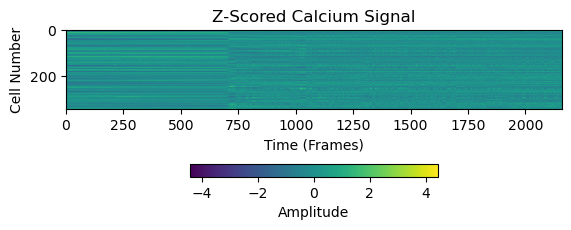

In [2]:
data = pd.read_csv("series.csv", header=0).values # Load in data as numpy array.
data = zscore(data, axis=1) # zscore each row. 

fig, ax = plt.subplots(1,1)
# Putting a max on the colorbar, just to highlight the structure. 
im = ax.imshow(data, cmap="viridis", vmin=data.min(), vmax=-1.0*data.min())
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5, label="Amplitude")
ax.set_xlabel("Time (Frames)")
ax.set_ylabel("Cell Number")
plt.title("Z-Scored Calcium Signal")

Above you can see a carpet plot of the z-score calcm time series.

The data may be contaminated by "global signal": large changes in amplitude that impact all the cells equally. These may be of biological significance, but may also be a consequence of artifacts introduced by data collection (bumping the sample, changes in light, etc). 

Global signal is computed as the mean of each frame, and can be treated just like any time series. 

I generally recommend regressing out this global signal, although it isn't necessary. 

Text(0.5, 1.0, 'Global Signal')

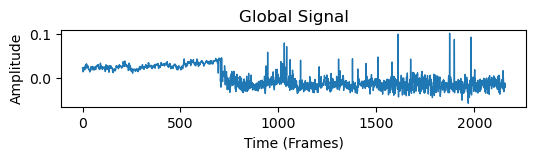

In [3]:
# Visualizing the global signal
global_signal = data.mean(axis=0)

plt.figure(figsize=(6,1), dpi=100)
plt.plot(global_signal, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Amplitude")
plt.title("Global Signal")

Here we can see there is a significant global signal: around 600 frames, there is some kind of change, after which the amplitude drops and the signal gets noisier. 

We can regress out the global signal using $\texttt{global_signal_regression}$ function.

In [3]:
from integration import global_signal_regression

data = global_signal_regression(data)

The next pre-processing step is removing the autocorrelation; calcium signals are known to be highly autocorrelated which can artifically inflate pairwise dependencies between time series by reducing the effective degrees of freedom. 

Text(0, 0.5, '$X_{t}$')

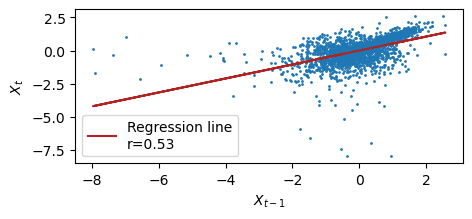

In [5]:
# Visualizing autocorrelation in a single cell. 

from scipy.stats import linregress

plt.figure(figsize=(5,2), dpi=100)

plt.scatter(data[0,:-1], data[0, 1:], s=1)

lr = linregress(data[0,:-1], data[0,1:])
y_pred = lr[1] + (lr[0]*data[0,:-1])

plt.plot(data[0,:-1], y_pred, color="firebrick", label="Regression line\nr={0}".format(round(lr[2],2)))
plt.legend()

plt.xlabel(r"$X_{t-1}$")
plt.ylabel(r"$X_{t}$")

We can remove the cell-level autocorrelation with the $\texttt{remove_autocorrelation}$ function and see how it changes the time series.

In [4]:
from integration import remove_autocorrelation

data = remove_autocorrelation(data)

The $\texttt{remove_autocorrelation}$ function may not remove *all* the autocorrelation if there is any nonlinear component, or autocorrelation that spans multiple lags, but it should be enough to clean up the data. 

At this point, you could continue using Gaussian estimators (which I do here), or binarize above and below the mean if you wanted to move to discrete analyses. Both have their pros and cons (I have code for both, although the discrete code isn't included here). 

Text(0, 0.5, '$X_{t}$')

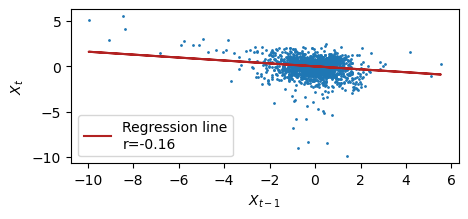

In [7]:
plt.figure(figsize=(5,2), dpi=100)

plt.scatter(data[0,:-1], data[0, 1:], s=1)

lr = linregress(data[0,:-1], data[0,1:])
y_pred = lr[1] + (lr[0]*data[0,:-1])

plt.plot(data[0,:-1], y_pred, color="firebrick", label="Regression line\nr={0}".format(round(lr[2],2)))
plt.legend()

plt.xlabel(r"$X_{t-1}$")
plt.ylabel(r"$X_{t}$")

So, now we have cleaned out data by removing the global signal and removing autocorrelation from each element. 
We are now ready to look at our time-localized measures of global integration. 

### Static Measures

Text(0.5, 1.0, 'Local Total Correlation\nAverage = 503.052 nat')

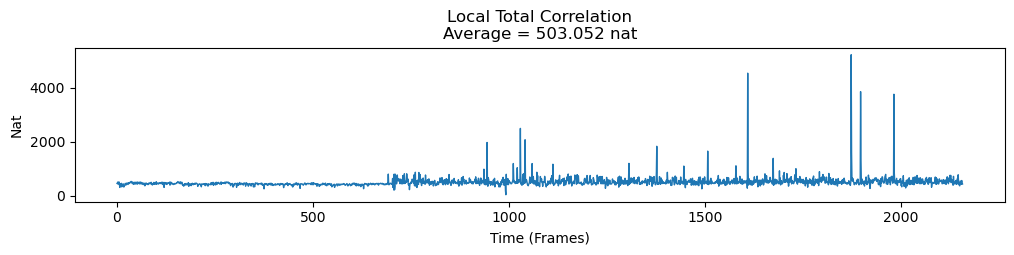

In [27]:
# Visualizing all of the measures. 
from integration import local_total_correlation, local_dual_total_correlation, local_o_information, local_s_information, local_tse_complexity

tc = local_total_correlation(data)

plt.figure(figsize=(12,2), dpi=100)
plt.plot(tc, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Local Total Correlation\nAverage = {0} nat".format(round(tc.mean(),3)))

Text(0.5, 1.0, 'Local Dual Total Correlation\nAverage = 108.882 nat')

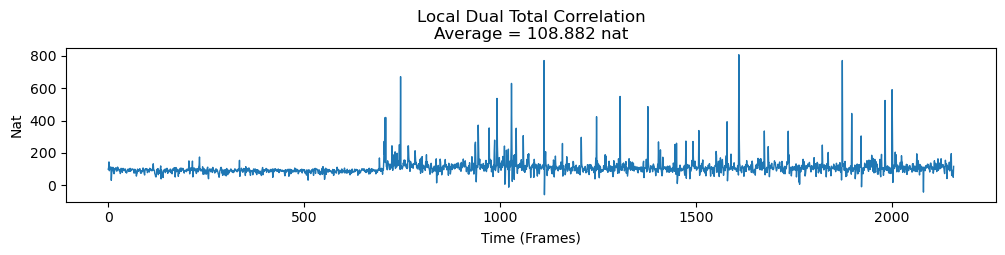

In [28]:
dtc = local_dual_total_correlation(data)

plt.figure(figsize=(12,2), dpi=100)
plt.plot(dtc, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Local Dual Total Correlation\nAverage = {0} nat".format(round(dtc.mean(),3)))

Text(0.5, 1.0, 'Local O-Information\nAverage = 394.17 nat')

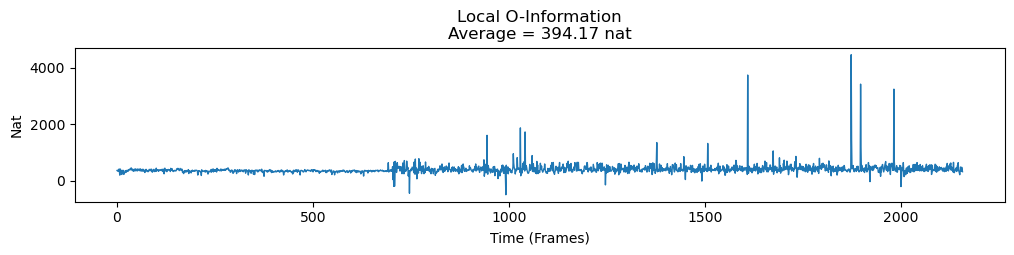

In [29]:
o = local_o_information(data)

plt.figure(figsize=(12,2), dpi=100)
plt.plot(o, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Local O-Information\nAverage = {0} nat".format(round(o.mean(),3)))

Text(0.5, 1.0, 'Local S-Information\nAverage = 611.934 nat')

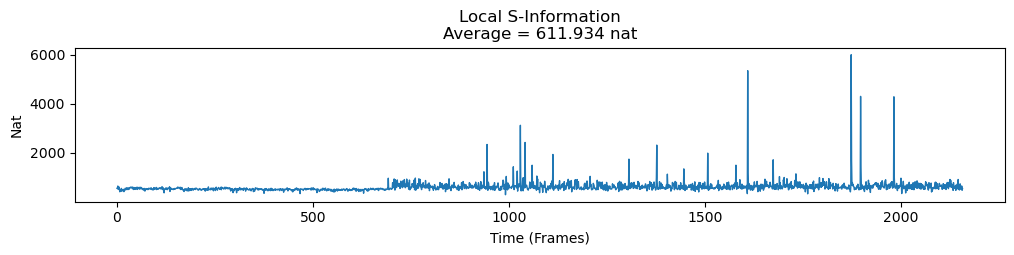

In [15]:
s = local_s_information(data)

plt.figure(figsize=(12,2), dpi=100)
plt.plot(s, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Local S-Information\nAverage = {0} nat".format(round(s.mean(),3)))

Text(0.5, 1.0, 'Local TSE-Complexity\nAverage = 8504.299 nat')

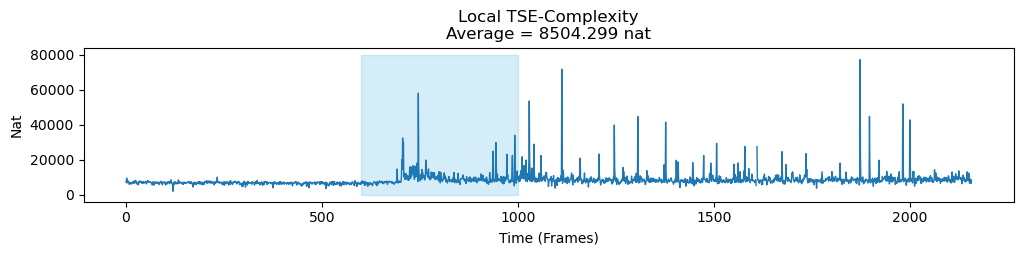

In [93]:
tse = local_tse_complexity(data, num_samples=25)

# The divide-by-zero warning tells us there will be an inf somewhere in there. 
# This can occur if there is an underflow error in the probability estimation 
# by scipy's multivariate_normal.pdf() function. An event is so improbable that 
# it gets cast as zero. 

where_inf = np.where(np.isinf(tse))[0]
tse[where_inf] = np.nan

plt.figure(figsize=(12,2), dpi=100)
plt.plot(tse, linewidth=1)
plt.fill_between([600,1000], 0, 80_000, color="skyblue", alpha=0.35)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Local TSE-Complexity\nAverage = {0} nat".format(round(np.nanmean(tse),3)))

Looking at all of the time-series, it is clear that the xenobot spends most of it's time in a weakly-redundantly integrated state, and that there are very short, intense, "bursts" of higher-order integration (synergistic, complex, etc). 

The major exception is the TSE complexity, which does appear to have a larger number of multi-frame, temporal excursions from the mean. These transient periods of higher complexity are interesting to me. We can see a zoomed-in view of the skyblue slice below:

Text(0.5, 1.0, 'Zoom in on Local TSE Complexity')

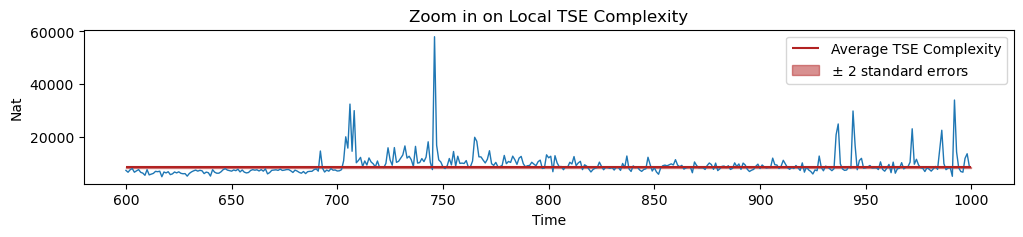

In [89]:
mean_tse = np.nanmean(tse)
std_tse = np.nanstd(tse) / np.sqrt(tse.shape[0])

plt.figure(figsize=(12,2), dpi=100)
plt.plot(tse[600:1000], linewidth=1)
plt.hlines(mean_tse, 0, 400, color="firebrick", label="Average TSE Complexity")
plt.fill_between([0,400], mean_tse-(2*std_tse), mean_tse+(2*std_tse), color="firebrick", alpha=0.5,
                label=r"$\pm$ 2 standard errors")
plt.xticks(
    [i for i in range(410) if i % 50 == 0],
    [i+600 for i in range(410) if i % 50 == 0]
          )
plt.legend()
plt.xlabel("Time")
plt.ylabel("Nat")
plt.title("Zoom in on Local TSE Complexity")

Exactly what is up with this is a bit beyond me, but I'd like to explore more. 

Now we will move on to:

### Dynamic measures. 

The first step is to compute the minimum information bipartition. We begin with the effective information matrix: 

In [34]:
from integration import mutual_information_matrix
# Computing the MI matrix. No signficance testing or thresholding to keep it simple.
mimat = mutual_information_matrix(data, alpha=1, bonferonni=False, lag=1)

The resulting matrix looks sane to me. 

Text(0.5, 1.0, 'Mutual information matrix')

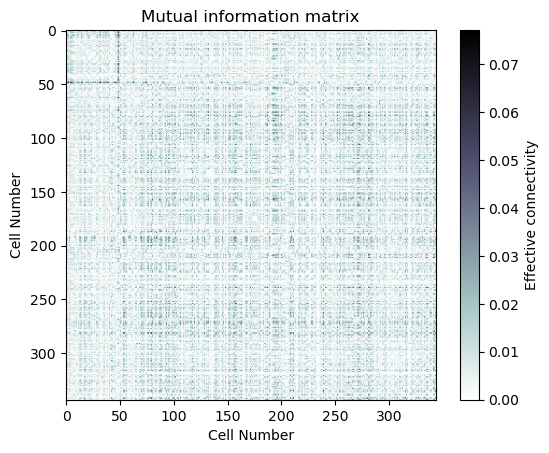

In [6]:
fig, ax = plt.subplots(1,1)
# Putting a max on the colorbar, just to highlight the structure. 
im = ax.imshow(mimat, cmap="bone_r")
fig.colorbar(im, ax=ax, location="right", shrink=1, label="Effective connectivity")
ax.set_xlabel("Cell Number")
ax.set_ylabel("Cell Number")
plt.title("Mutual information matrix")

We can compute the MIB with the $\texttt{minimum_information_bipartition}$ function:


In [7]:
from integration import minimum_information_bipartition
mib = minimum_information_bipartition(mimat)

In [8]:
# The fiedler vector does a decent job of approximately bisecting the network.
# it's not a perfect, but it's not just cutting off one or two lonely nodes either. 
print([len(x) for x in mib])

component_1 = data[mib[0],:].mean(axis=0)
component_2 = data[mib[1],:].mean(axis=0)

data_reduced = np.vstack((component_1, component_2))

[297, 47]


We now have everything in place we need for the dynamic measures. 



We can do the full $\Phi$ID analysis by calling the $\texttt{local_phi_id}$ function:

In [ ]:
from integration import local_phi_id
phi_results = local_phi_id(0, 1, data_reduced, lag=1)

Now we can plot a variety of time series, just as before. 

Starting with the persistent synergy:

Text(0.5, 1.0, 'Persistent Synergy\nAverage = 0.012 nat')

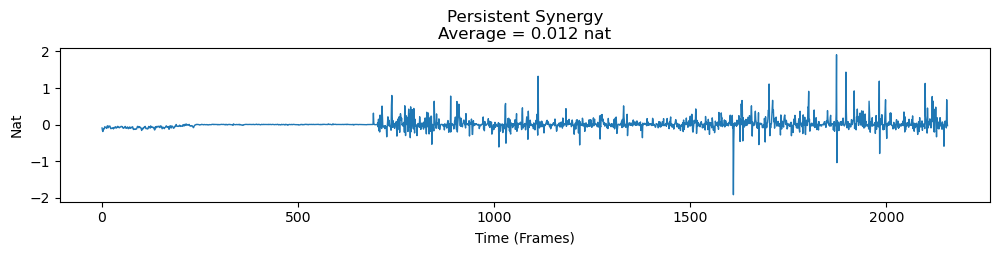

In [17]:
plt.figure(figsize=(12,2), dpi=100)
syn = phi_results.nodes[(((0, 1),), ((0, 1),))]["pi"]
plt.plot(syn, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Persistent Synergy\nAverage = {0} nat".format(round(np.nanmean(syn),3)))

Text(0.5, 1.0, 'Downwards Causation\nAverage = -0.005 nat')

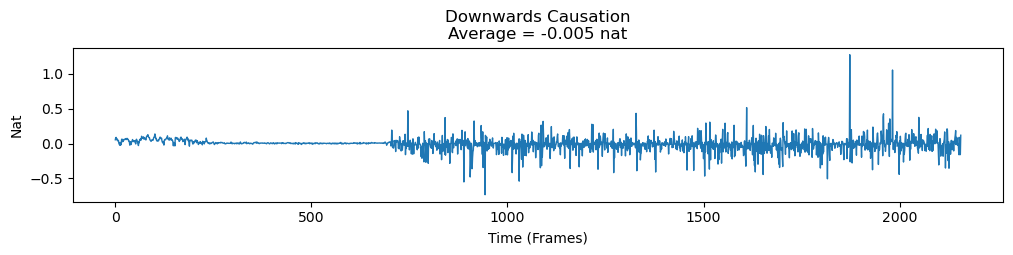

In [21]:
plt.figure(figsize=(12,2), dpi=100)
dc = phi_results.nodes[(((0, 1),), ((0,),))]["pi"] + phi_results.nodes[(((0, 1),), ((1,),))]["pi"]
plt.plot(dc, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Downwards Causation\nAverage = {0} nat".format(round(np.nanmean(dc),3)))

Text(0.5, 1.0, 'Presistent Redundancy\nAverage = 0.073 nat')

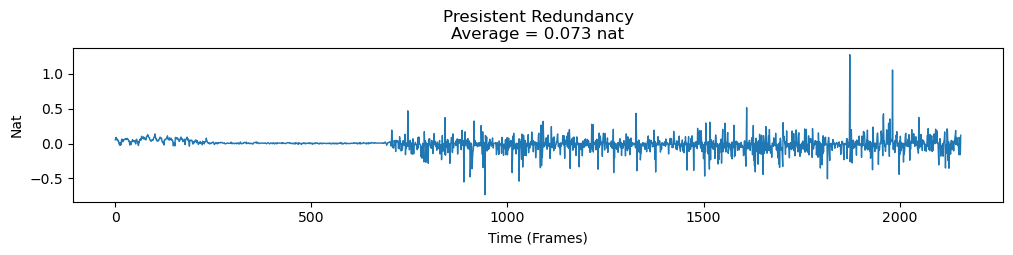

In [22]:
plt.figure(figsize=(12,2), dpi=100)
red = phi_results.nodes[(((0,), (1,)), ((0,), (1,)))]["pi"] + phi_results.nodes[(((0,), (1,)), ((0,), (1,)))]["pi"]
plt.plot(dc, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Presistent Redundancy\nAverage = {0} nat".format(round(np.nanmean(red),3)))

Text(0.5, 1.0, 'Integrated Information (Corrected)\nAverage = -0.002 nat')

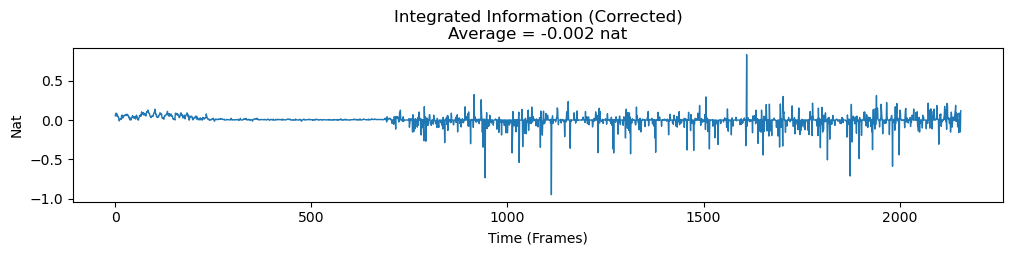

In [24]:
from integration import local_phi_r

phir = local_phi_r(phi_results)

plt.figure(figsize=(12,2), dpi=100)
plt.plot(phir, linewidth=1)
plt.xlabel("Time (Frames)")
plt.ylabel("Nat")
plt.title("Integrated Information (Corrected)\nAverage = {0} nat".format(round(np.nanmean(phir),3)))

We can see that the patterns are globally similar to the static measures (brief, bursty excursions from the mean). However, the specific locations of the bursts is different. 

## Wrap-Up

I'm not going to do any more analysis of these results here - the point is to demo the code and make sure that it's generally what you guys are interested in. 